## Import libraries

In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Create a directory to store data

In [2]:
isExist = os.path.exists('./snotel_data1')
if isExist == True:
    exit
else:
    os.mkdir('./snotel_data1')

In [3]:
%%bash
pwd

/bsuscratch/stanleyakor/uppercolorado/ml_frameworks/evaluation/DOWNLOAD_SNOTEL


## Read the file that contains information about SNOTEL sites

In [4]:
SNOTEL_info = pd.read_csv('./NRCS_SNOTEL_Locations_noAlaska.csv')

In [5]:
set(SNOTEL_info['State'])

{'AZ', 'CA', 'CO', 'ID', 'MT', 'NM', 'NV', 'OR', 'SD', 'UT', 'WA', 'WY'}

In [6]:
SNOTEL_info.head(3)

,Station ID,State,Network,Station Name,Latitude,Longitude,Elevation,HUC2 (2-digit),HUC2 Name,HUC4 (4-digit),...,HUC6 Name,HUC8 (8-digit),HUC8 Name,HUC10 (10-digit),HUC10 Name,HUC12 (12-digit),HUC12 Name,Report Time Zone (Offset from GMT),Start Date,End Date
0,301,CA,SNOTEL,Adin Mtn,41.23583,-120.79192,6190,18,California Region,1802,...,Upper Sacramento,18020002,Upper Pit,1802000214,Cottonwood Creek-Ash Creek,1.800000e+11,Cottonwood Creek,-8,10/1/1983,1/1/2100
1,907,UT,SNOTEL,Agua Canyon,37.52217,-112.27118,8900,16,Great Basin Region,1603,...,Escalante Desert-Sevier Lake,16030002,East Fork Sevier,1603000203,Upper East Fork Sevier River,1.600000e+11,East Fork Sevier River Headwaters,-8,10/1/1994,1/1/2100
2,916,MT,SNOTEL,Albro Lake,45.59723,-111.95902,8300,10,Missouri Region,1002,...,Missouri Headwaters,10020005,Jefferson,1002000507,Willow Creek,1.000000e+11,South Willow Creek,-8,9/1/1996,1/1/2100


## Define parameters

In [7]:
StartDate = '2014'
EndDate = '2015'
State = 'CO'
Names = list(SNOTEL_info[SNOTEL_info['State']==State]['Station Name'].values)
IDs = list(SNOTEL_info[SNOTEL_info['State']==State]['Station ID'].values)
Lat = list(SNOTEL_info[SNOTEL_info['State'] ==State]['Latitude'].values)
Lon = list(SNOTEL_info[SNOTEL_info['State'] ==State]['Longitude'].values)
Elevation = list(SNOTEL_info[SNOTEL_info['State'] ==State]['Elevation'].values)

In [8]:
# SNOTEL = pd.DataFrame({'Name':Names, 'ID':IDs, 'Latitude':Lat, 'Longitude':Lon})
# SNOTEL['State'] = State

#### For CALIFORNIA, turn on the following lines:
### It seems the site name changed from "Squaw Valley G.C." to "Palisades Tahoe "
# SNOTEL.loc[SNOTEL['ID']==784, 'Name']="Palisades Tahoe"

# ### For UTAH, turn on the following lines:
# ## There is two space between the terms on the website (if opening the url)
# SNOTEL.loc[SNOTEL['ID']==763, 'Name']="Smith  Morehouse"
# print(SNOTEL[SNOTEL['ID']==763]['Name']=='Smith  Morehouse')

SNOTEL = pd.DataFrame({'Name':Names, 'ID':IDs, 'Latitude':Lat, 'Longitude':Lon, 'Elevation':Elevation})
SNOTEL['State'] = State

SNOTEL

,Name,ID,Latitude,Longitude,Elevation,State
0,Apishapa,303,37.33062,-105.06749,10000,CO
1,Arapaho Ridge,1030,40.35098,-106.38142,10960,CO
2,Bear Lake,322,40.31118,-105.64483,9500,CO
3,Bear River,1061,40.06153,-107.00955,9080,CO
4,Beartown,327,37.71409,-107.51212,11600,CO
...,...,...,...,...,...,...
110,Wild Basin,1042,40.20105,-105.60248,9560,CO
111,Willow Creek Pass,869,40.34703,-106.09433,9540,CO
112,Willow Park,870,40.43254,-105.73337,10700,CO
113,Wolf Creek Summit,874,37.47922,-106.80170,11000,CO


In [9]:
# Some SNOTEL sites in the Boise Rockies

Required = SNOTEL[(40.317627 >= SNOTEL['Latitude']) & (SNOTEL['Latitude'] >= 36.810326) & (-105.09583 >= SNOTEL['Longitude']) & (SNOTEL['Longitude'] >= -109.0985)]
Required



,Name,ID,Latitude,Longitude,Elevation,State
2,Bear Lake,322,40.31118,-105.64483,9500,CO
3,Bear River,1061,40.06153,-107.00955,9080,CO
4,Beartown,327,37.71409,-107.51212,11600,CO
5,Beaver Ck Village,1041,39.59917,-106.51142,8500,CO
6,Berthoud Summit,335,39.80392,-105.77789,11300,CO
...,...,...,...,...,...,...
107,Wager Gulch,1188,37.88248,-107.36430,11100,CO
108,Weminuche Creek,1160,37.51976,-107.32152,10740,CO
109,Whiskey Ck,857,37.21411,-105.12245,10220,CO
110,Wild Basin,1042,40.20105,-105.60248,9560,CO


In [10]:

# # subset to Bogus Basin, return a dataframe with just Bogus basin
# bogus_basin = Required.iloc[3].to_frame().T
# bogus_basin

## Retrieve data by calling getData.py script
The python script retrieves the following variable:
- PREC: PRECIPITATION ACCUMULATION
- PRCP: PRECIPITATION INCREMENT
- PRCPSA: PRECIPITATION INCREMENT – SNOW-ADJUSTED
- WTEQ: SNOW WATER EQUIVALENT
- SNRR: SNOW RAIN RATIO
If you need other variables, please visit https://wcc.sc.egov.usda.gov/reportGenerator/ and https://www.wcc.nrcs.usda.gov/web_service/AWDB_Web_Service_Reference.htm, and make corresponding changes the python script.  

The script also re-calculates SNRR based on snow-adjusted precipitation data because the original SNRR is calculated using unadjusted precipitation. 


In [ ]:
# for i in SNOTEL.index:
#     !python collect_snotel2.py "{SNOTEL['Name'][i]}" {SNOTEL['ID'][i]} {SNOTEL['State'][i]} {StartDate} {EndDate}

for i in Required.index:
    !python download_snotel.py "{Required['Name'][i]}" {Required['ID'][i]} {Required['State'][i]} {StartDate} {EndDate}

## Move CSV files to the directory that was created earlier

In [ ]:
!mv ./df_*.csv ./snotel_data1/

In [ ]:

# create a storage bucket
## iterate over stations id
## for each station, iterate over folders with water year data
## append the array of station SWE obtained to the bucket

In [10]:
import numpy as np
import pandas as pd

# Loop through IDs
ID = []
for i in Required.index:
    ID.append(Required['ID'][i])

fname = [f'df_{id}.csv' for id in ID]

# Loop through paths
path_list = []
for i in range(1, 2):
    path = f'/bsuscratch/stanleyakor/uppercolorado/ml_frameworks/evaluation/DOWNLOAD_SNOTEL/snotel_data{i}'
    path_list.append(path)

# Matrix for station data: shape -> (number of stations, len of data)
stations = np.zeros((len(ID), 365))

# Collect data
for index, fn in enumerate(fname):
    bucket = []
    for pth in path_list:
        pdf_file = pd.read_csv(pth + '/' + fn)
        # Filter Snow Water Equivalent column
        pdf_file = pdf_file.filter(like='Snow Water Equivalent (in) Start of Day Values').values.flatten()
        
        # Check for NaN values
        if np.any(np.isnan(pdf_file)):
            print(f'NaN values found in file: {pth}/{fn}')
        
        # Extend the bucket with all values including NaNs
        bucket.extend(pdf_file)
    
    # Convert bucket to a numpy array and trim to fit the 365-day format
    bucket_array = np.array(bucket)

    
    # Assign the data to the corresponding row in the stations matrix
    stations[index, :] = bucket_array


In [11]:
stations

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0.3, 0.3, 0.3, ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0.3, 0.3, 0.2, ..., 0. , 0. , 0. ]])

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming IDs and paths setup as before

# Matrix for station data: shape -> (number of stations, len of data)
stations = np.zeros((365,len(ID)))

# Dictionary to store scalers for each station
scalers = {}

# Collect data
for index, fn in enumerate(fname):
    bucket = []
    for pth in path_list:
        pdf_file = pd.read_csv(pth + '/' + fn)
        # Filter Snow Water Equivalent column
        pdf_file = pdf_file.filter(like='Snow Water Equivalent (in) Start of Day Values').values.flatten()
        
        # Check for NaN values
        if np.any(np.isnan(pdf_file)):
            print(f'NaN values found in file: {pth}/{fn}')
        
        # Extend the bucket with all values including NaNs
        bucket.extend(pdf_file)
    
    # Convert bucket to a numpy array and trim/pad to fit the 365-day format
    bucket_array = np.array(bucket)
    if bucket_array.size > 365:
        bucket_array = bucket_array[:365]
    elif bucket_array.size < 365:
        bucket_array = np.pad(bucket_array, (0, 365 - bucket_array.size), mode='constant', constant_values=np.nan)
    
    # Assign the data to the corresponding row in the stations matrix
    stations[ :,index] = bucket_array

# Normalize the values in the stations matrix using MinMaxScaler
for i in range(stations.shape[1]):
    station_data = stations[:, i]
    
    # Reshape data for the scaler (ignoring NaN values)
    mask = ~np.isnan(station_data)
    if mask.any():  # Check if there are any valid values
        # Create a scaler for each station and fit to the data
        scaler = MinMaxScaler(feature_range=(0, 1))
        station_data[mask] = scaler.fit_transform(station_data[mask].reshape(-1, 1)).flatten()
        
        # Save the scaler for later use (inverse transformation)
        scalers[i] = scaler
    
    # Store normalized values back in the stations matrix
    stations[:, i] = station_data

# Now the stations matrix is normalized and scalers are saved for each station


In [13]:
import os
import sys
parent_dir = os.path.abspath('../../')  
sys.path.append(parent_dir)

In [14]:
import logging
from keras.callbacks import ModelCheckpoint
import io
import sys
from contextlib import redirect_stdout
from utils import *
from model_0 import *
from keras.callbacks import Callback
# Set up logging
logging.basicConfig(filename='logfile.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

logger = logging.getLogger()

# Define a custom callback to log training loss
class LossLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        loss = logs.get('loss')
        logger.info(f'Epoch {epoch + 1}, Loss: {loss}')




2024-09-12 11:11:31.065265: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-12 11:11:31.098504: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-12 11:11:31.098523: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-12 11:11:31.099664: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-12 11:11:31.105473: I tensorflow/core/platform/cpu_feature_gua

In [15]:
## Get static variables
static = xr.open_dataset('/bsuscratch/stanleyakor/uppercolorado/static_inputs/wrfout_d02_2000-04-08_00:00:00').isel(Time = 0)

lat = static.XLAT.values[:,0]
lon = static.XLONG.values[0,:]

# Load data
data = data_split('2015','2015')
data2  = data_split_2('2015','2015')

static = static.coarsen(south_north=8, west_east=8, boundary='trim').mean()
data =  data.coarsen(south_north=8, west_east=8, boundary='trim').mean()

data2 =  data2.coarsen(south_north=8, west_east=8, boundary='trim').mean()

# set up snow covered area data
#threshold = 1/80
#binary_mask = np.where(data['SNOWH'] > threshold, 1, 0)
#binary_mask_expanded = np.expand_dims(binary_mask, axis=-1)

start = '2014-10-01'
end = '2015-09-30'







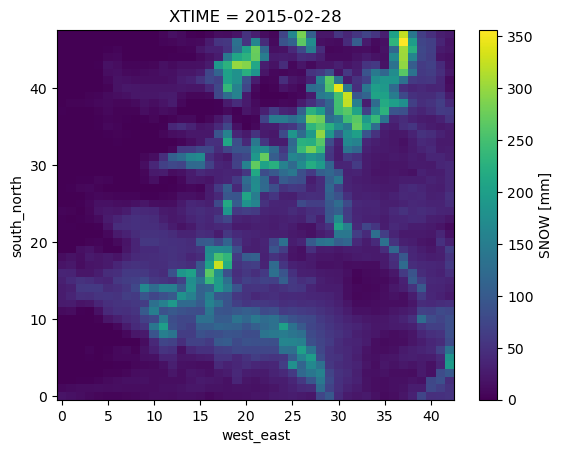

In [47]:
data['SNOW'].isel(XTIME =150).plot()

In [31]:
# Extract variables of interest
dynamic_var2 = ['PRCP'] 
dynamic_var1 = ['SNOWNC','TMIN', 'TMAX'] 
static_var = ['HGT']

print('VARIABLES....................')
print(dynamic_var2)
print(dynamic_var1)
print(static_var)


# Normalize data
x1,_ = data_preparation(data,static,dynamic_var1, static_var)
x2,_=data_preparation(data2,None,dynamic_var2, None)


# concatenate to a global x
X = np.concatenate([x1, x2], axis=-1)

VARIABLES....................
['PRCP']
['SNOWNC', 'TMIN', 'TMAX']
['HGT']


In [32]:
# X = np.expand_dims(X, axis=0) 

In [33]:
X.shape

(365, 48, 43, 5)

In [34]:
# def data_generator(X, stations, batch_size):
#     num_samples = X.shape[0]
    
#     # Create a dataset object from the input data
#     dataset = tf.data.Dataset.from_tensor_slices((X, stations))
    
#     # Shuffle and batch the dataset
#     dataset = dataset.shuffle(buffer_size=num_samples).batch(batch_size)
    
#     return dataset

# # Assuming X.shape = (365, 390, 348, 6) and stations.shape = (365, 92)
# batch_size = 8 # Adjust batch size based on memory availability
# dataset = data_generator(X, stations, batch_size)
X_train = X.reshape((-1, 365, 48, 43, 5))
y_train = stations.reshape((-1,365,92))

In [35]:
X_train.shape


(1, 365, 48, 43, 5)

In [36]:
batch_size = 2
# Assuming you're using a dataset loader
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.batch(batch_size)


In [37]:
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 365, 48, 43, 5), dtype=tf.float64, name=None), TensorSpec(shape=(None, 365, 92), dtype=tf.float64, name=None))>

In [38]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import TimeDistributed, Conv2D, MaxPooling2D, GlobalMaxPooling2D, Flatten, LSTM, Dense, Dropout


# Define the model
def build_bulk_model(learning_rate):
    model = Sequential()

    # TimeDistributed Conv2D layers
    model.add(TimeDistributed(Conv2D(filters=32, kernel_size=(1, 1), activation='relu', padding='same'),
                              input_shape=(n_days, height, width, nchannels)))
    model.add(TimeDistributed(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')))
    model.add(TimeDistributed(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')))
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))

    # Additional Conv2D layers
    model.add(TimeDistributed(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')))
    model.add(TimeDistributed(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')))
    
    # Global MaxPooling
    model.add(TimeDistributed(GlobalMaxPooling2D()))
    
    # Flatten and Dropout
    model.add(TimeDistributed(Flatten()))
    model.add(Dropout(rate=0.1))
    
    # LSTM layer
    model.add(LSTM(80, return_sequences=False))
    
    # Dense layer
    model.add(Dense(n_stations, activation='linear'))  # 95 stations as output
    
    # Compile the model
    model.compile(loss=tf.keras.losses.MSE, optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
    
    return model



In [39]:
# Define the sample input data dimensions
n_days = X.shape[0] # sequence length (365 days)
height = X.shape[1]  # spatial dimension (height of grid)
width = X.shape[2]   # spatial dimension (width of grid)
nchannels = X.shape[3] # number of channels (variables)
n_stations = 92  # number of stations for the target output

In [40]:
X.shape

(365, 48, 43, 5)

In [41]:
# Build the model
learning_rate = 0.001
model = build_bulk_model(learning_rate)

# Print the model summary
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_8              │ (None, 365, 48, 43,    │           192 │
│ (TimeDistributed)               │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_9              │ (None, 365, 48, 43,    │         4,624 │
│ (TimeDistributed)               │ 16)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_10             │ (None, 365, 48, 43,    │         2,320 │
│ (TimeDistributed)               │ 16)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_11             │ (None, 365, 24, 21,    │             0 │
│ (TimeDistributed)               │ 16)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_12             │ (None, 365, 24, 21,    │         4,640 │
│ (TimeDistributed)               │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_13             │ (None, 365, 24, 21,    │         9,248 │
│ (TimeDistributed)               │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_14             │ (None, 365, 32)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_15             │ (None, 365, 32)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 365, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 80)             │        36,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 92)             │         7,452 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,636 (252.48 KB)

 Trainable params: 64,636 (252.48 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:

epochs = 100 # Number of epochs for training
model.fit(X_train,y_train, epochs=epochs)



Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 97s 97s/step - loss: 0.2026
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - loss: 0.1975
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - loss: 0.1907
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - loss: 0.1821
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - loss: 0.1718
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - loss: 0.1608
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - loss: 0.1550
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - loss: 0.1513
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - loss: 0.1434
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - loss: 0.1357
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - loss: 0.1317
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - loss: 0.1287
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - loss: 0.1252
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - loss: 0.1239
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - loss: 0.1211
Epoch

In [44]:
X_train.shape

(1, 365, 48, 43, 5)